In [2]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

data_dir = Path("../data/raw")

In [16]:
classes = sorted([d for d in os.listdir(data_dir) if os.path.isdir(data_dir / d)])
print(f"Classes: {len(classes)}")
print(f"{classes}")

Classes: 10
['anchor', 'balloon', 'bicycle', 'envelope', 'paper_boat', 'peace_symbol', 'smiley', 'speech_bubble', 'spiral', 'thumb']


In [10]:
for cls in classes:
    images = [f for f in os.listdir(data_dir / cls)]
    print(f"{cls}: {len(images)} obrazow")

anchor: 44 obrazow
balloon: 43 obrazow
bicycle: 44 obrazow
envelope: 44 obrazow
paper_boat: 42 obrazow
peace_symbol: 43 obrazow
smiley: 43 obrazow
speech_bubble: 41 obrazow
spiral: 43 obrazow
thumb: 44 obrazow


In [28]:
sizes = []
for cls in classes[:3]:  
    class_path = data_dir / cls
    images = [f for f in os.listdir(class_path) if f.endswith('.jpg')]
    for img_name in images[:5]:
        img = Image.open(class_path / img_name)
        sizes.append(img.size)
        
print("Sizes:")
for i, size in enumerate(sizes[:10]):
    print(f"  {size}")

print(f"Unique Sizes: {np.unique(sizes)}")

Sizes:
  (160, 130)
  (160, 130)
  (160, 130)
  (160, 130)
  (160, 130)
  (160, 130)
  (160, 130)
  (160, 130)
  (160, 130)
  (160, 130)
Unique Sizes: [130 160]


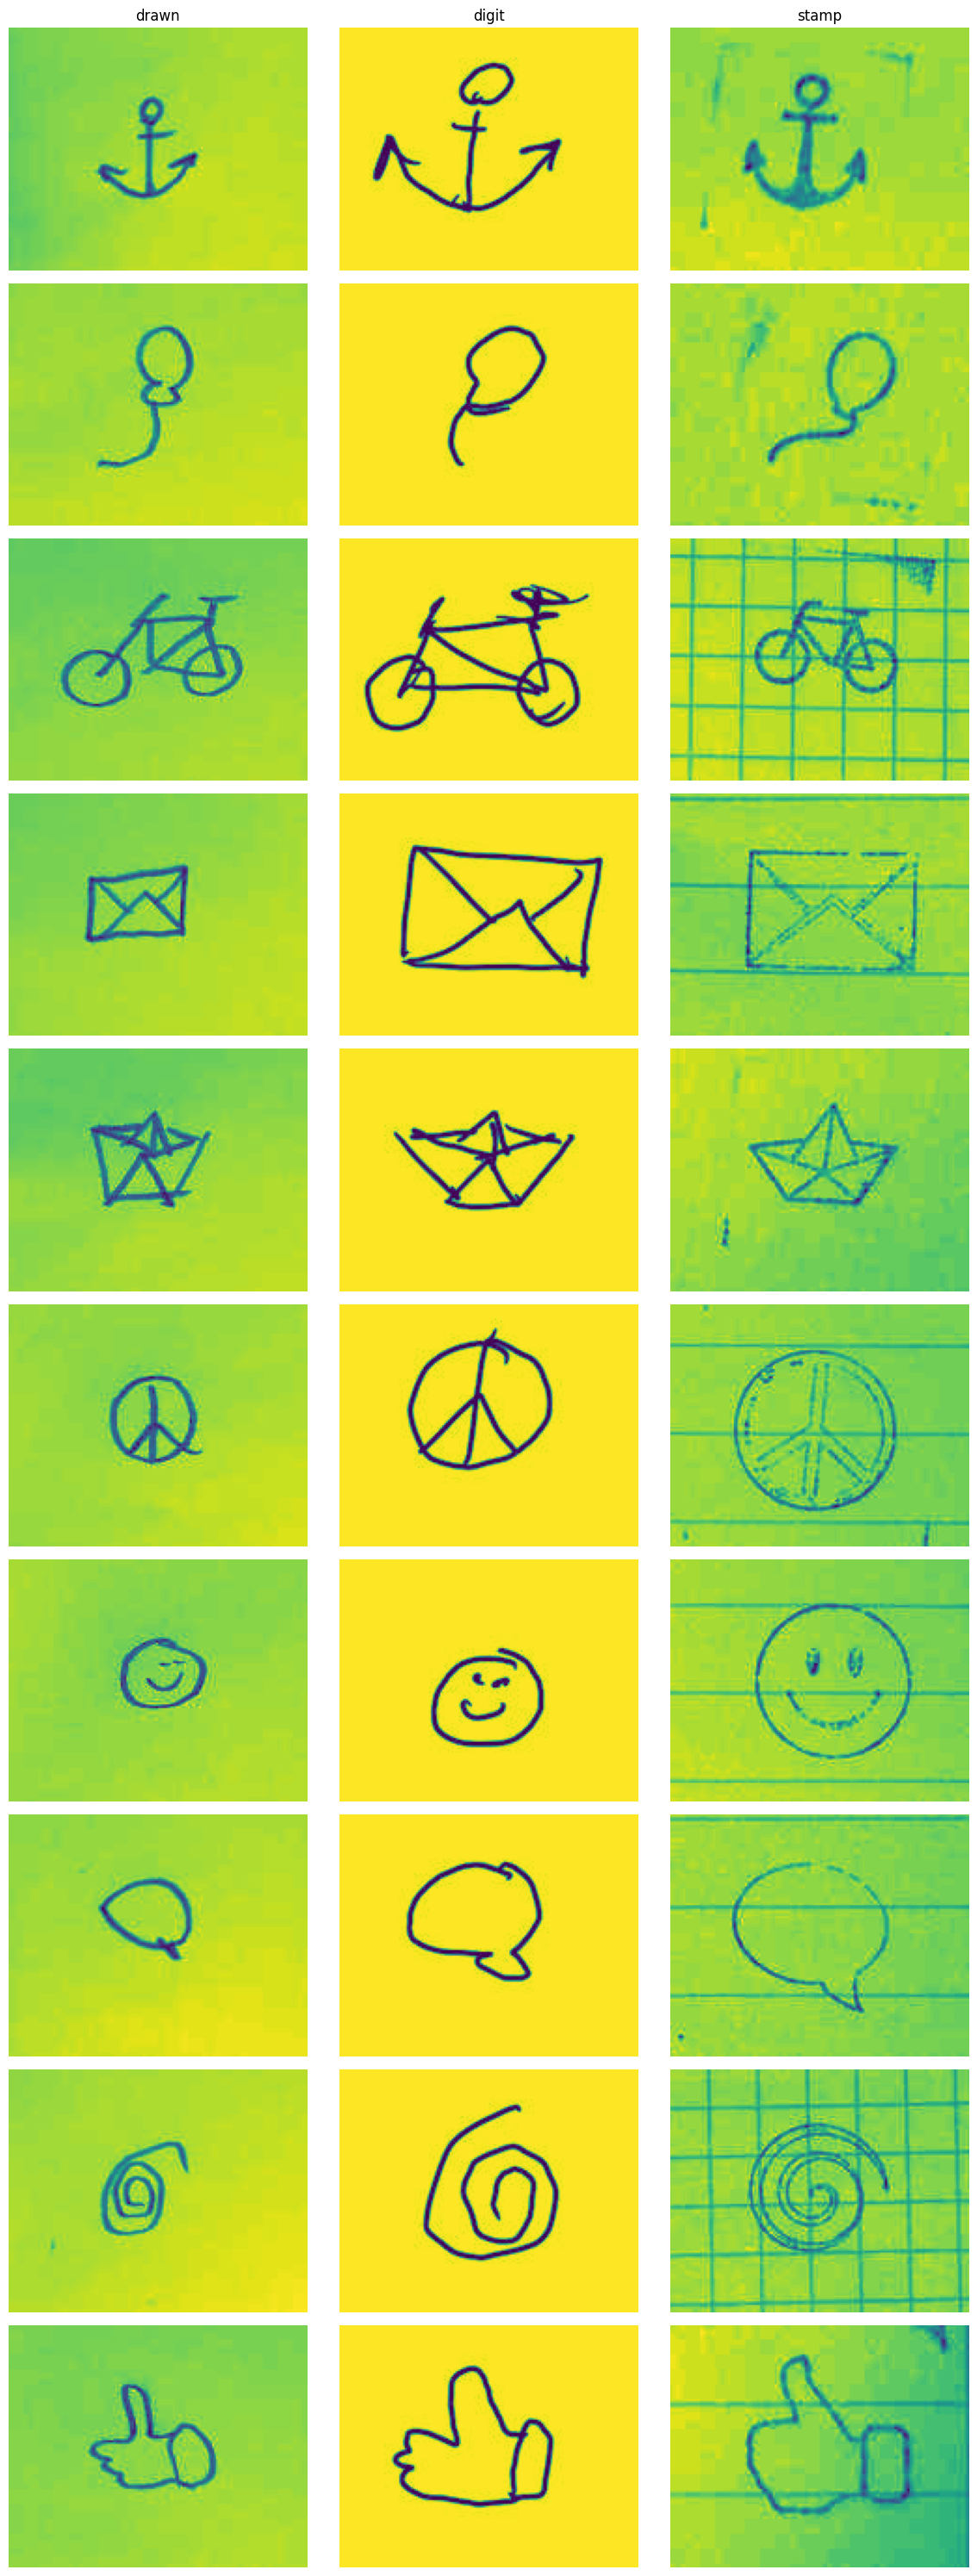

In [30]:
fig, axes = plt.subplots(len(classes), 3, figsize=(12, 3*len(classes)))

for i, cls in enumerate(classes):
    all_images = os.listdir(data_dir / cls)
    types = ['drawn', 'digit', 'stamp']
    
    for j, img_type in enumerate(types):
        matching = [img for img in all_images if img.startswith(img_type)]
        if matching:
            img = Image.open(data_dir / cls / matching[0])
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if i == 0:
                axes[i, j].set_title(img_type)

plt.tight_layout()
plt.show()
